# Домашняя работа на тему сверточные нейронные сети

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, Activation
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_labels_train), (X_test, y_labels_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

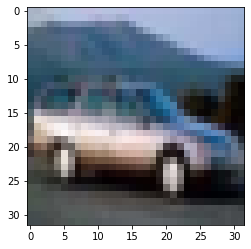

In [ ]:
plt.imshow(X_train[4])

In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_labels_train, 10)
y_test = to_categorical(y_labels_test, 10)

In [ ]:
X_train.shape[1:]

(32, 32, 3)

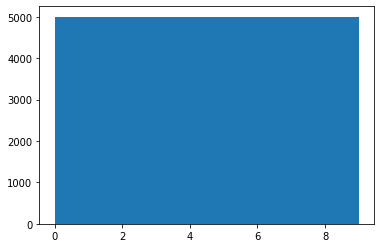

In [ ]:
plt.hist(y_labels_train, bins=10);

## 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10


In [ ]:
batch_size=200
epochs=5

In [ ]:
model = Sequential()

model.add(Conv2D(filters=6, 
                 kernel_size=3, 
                 strides=1, 
                 activation='relu',
                 input_shape=X_train.shape[1:],
                 padding='same'))

model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=12, 
                 kernel_size=3, 
                 activation='relu',
                 padding='same'))

model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x=X_train, y=y_train, 
                 epochs=6, 
                 batch_size=100,
                 validation_data=(X_test, y_test),
                 verbose=1,
                 workers=4)

Epoch 1/6
500/500 [==============================] - 13s 8ms/step - loss: 1.7136 - accuracy: 0.3799 - val_loss: 1.4408 - val_accuracy: 0.4814
Epoch 2/6
500/500 [==============================] - 3s 7ms/step - loss: 1.3850 - accuracy: 0.5031 - val_loss: 1.3084 - val_accuracy: 0.5297
Epoch 3/6
500/500 [==============================] - 4s 7ms/step - loss: 1.2636 - accuracy: 0.5477 - val_loss: 1.1983 - val_accuracy: 0.5767
Epoch 4/6
500/500 [==============================] - 4s 7ms/step - loss: 1.1785 - accuracy: 0.5806 - val_loss: 1.1568 - val_accuracy: 0.5924
Epoch 5/6
500/500 [==============================] - 3s 7ms/step - loss: 1.1137 - accuracy: 0.6038 - val_loss: 1.1441 - val_accuracy: 0.5970
Epoch 6/6
500/500 [==============================] - 3s 7ms/step - loss: 1.0684 - accuracy: 0.6232 - val_loss: 1.0932 - val_accuracy: 0.6142


## 2. Оценить рост точности при увеличении ширины сети (больше фильтров)


In [ ]:
def fit_model(filter_widths=6, verbose=0):
  model = Sequential()

  model.add(Conv2D(filters=filter_widths, 
                  kernel_size=3, 
                  strides=1, 
                  activation='relu',
                  input_shape=X_train.shape[1:],
                  padding='same'))

  model.add(MaxPooling2D(pool_size=2, padding='same'))

  model.add(Conv2D(filters=filter_widths * 2, 
                  kernel_size=3, 
                  activation='relu',
                  padding='same'))

  model.add(MaxPooling2D(pool_size=2, padding='same'))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(84, activation='relu'))

  model.add(Dense(10, activation='softmax'))

  model.compile(loss=categorical_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])

  return model.fit(x=X_train, y=y_train, 
                  epochs=10, 
                  batch_size=100,
                  validation_data=(X_test, y_test),
                  verbose=verbose,
                  workers=4)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


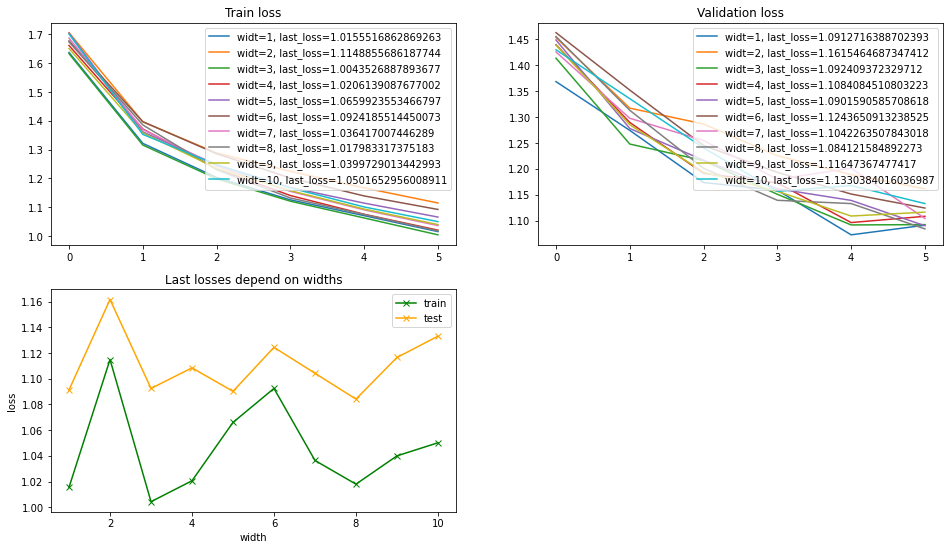

In [ ]:
plt.figure(figsize=(16, 9))
last_train_losses = []
last_val_losses = []
widths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for width in widths:
  history = fit_model(verbose=0)
  
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  last_train_losses.append(train_loss[-1])
  last_val_losses.append(val_loss[-1])

  plt.subplot(221)
  plt.plot(train_loss, label='widt={}, last_loss={}'.format(width, train_loss[-1]))
  plt.legend(loc='best')
  plt.title('Train loss')

  plt.subplot(222)
  plt.plot(val_loss, label='widt={}, last_loss={}'.format(width, val_loss[-1]))
  plt.legend(loc='best')
  plt.title('Validation loss')
  
plt.subplot(223)
plt.plot(widths, last_train_losses, '-x', label='train', c='green')
plt.plot(widths, last_val_losses, '-x', label='test', c='orange')
plt.xlabel('width')
plt.ylabel('loss')
plt.legend(loc='best')
plt.title('Last losses depend on widths')


plt.show()

Видно что существет минимум в зависимости ошибки от глубены слоев, который равен для нашей конфигурации 6

## 3. Оценить рост точности при увеличении глубины сети (больше слоев)


In [ ]:
def fit_model(filter_widths=3, deep=2, verbose=0):
  model = Sequential()


  model.add(Conv2D(filters=filter_widths, 
                  kernel_size=3, 
                  strides=1, 
                  activation='relu',
                  input_shape=X_train.shape[1:],
                  padding='same'))

  model.add(MaxPooling2D(pool_size=2, padding='same'))

  for _ in range(deep-2):

    model.add(Conv2D(filters=filter_widths, 
                    kernel_size=3, 
                    activation='relu',
                    padding='same'))

    model.add(MaxPooling2D(pool_size=2, padding='same', strides=1))

  model.add(Conv2D(filters=filter_widths, 
                    kernel_size=3, 
                    activation='relu',
                    padding='same'))

  model.add(MaxPooling2D(pool_size=2, padding='same'))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(84, activation='relu'))

  model.add(Dense(10, activation='softmax'))

  model.compile(loss=categorical_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])
  
  if verbose:
    print(model.summary())

  return model.fit(x=X_train, y=y_train, 
                  epochs=10, 
                  batch_size=100,
                  validation_data=(X_test, y_test),
                  verbose=verbose,
                  workers=4)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


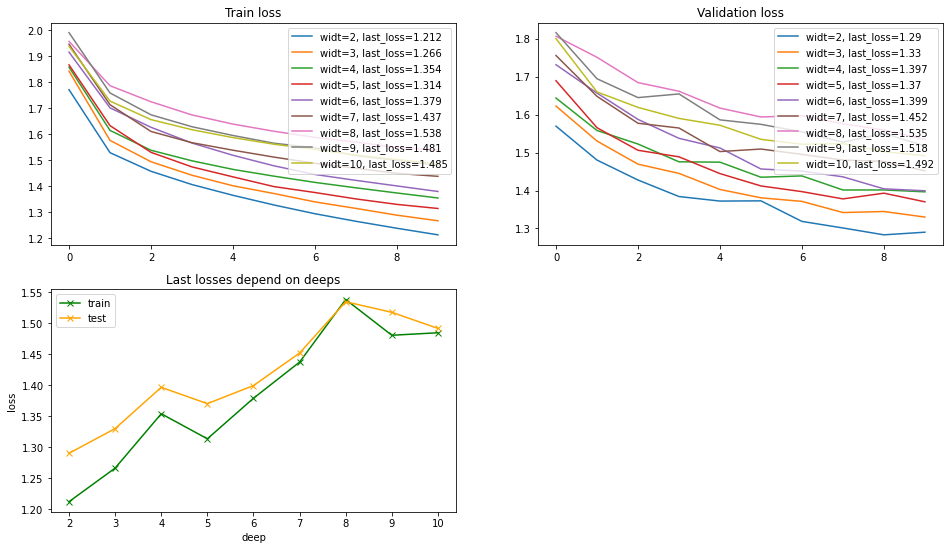

In [ ]:
plt.figure(figsize=(16, 9))
last_train_losses = []
last_val_losses = []
deeps = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for deep in deeps:
  history = fit_model(deep=deep)
  
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  last_train_losses.append(train_loss[-1])
  last_val_losses.append(val_loss[-1])

  plt.subplot(221)
  plt.plot(train_loss, label='widt={}, last_loss={}'.format(deep, round(train_loss[-1], 3)))
  plt.legend(loc='best')
  plt.title('Train loss')

  plt.subplot(222)
  plt.plot(val_loss, label='widt={}, last_loss={}'.format(deep, round(val_loss[-1], 3)))
  plt.legend(loc='best')
  plt.title('Validation loss')
  
plt.subplot(223)
plt.plot(deeps, last_train_losses, '-x', label='train', c='green')
plt.plot(deeps, last_val_losses, '-x', label='test', c='orange')
plt.xlabel('deep')
plt.ylabel('loss')
plt.legend(loc='best')
plt.title('Last losses depend on deeps')


plt.show()

## 4. *Сравнить с точностью полносвязной сети для этой выборки